 # Unsupervised machine learning

## Import dataset and explore data

We want to clusterize music from Spotify dataset.
On this dataset we have musics and 18 features on them: 
- genre, 
- artist_name, 
- track_name, 
- track_id, 
- popularity, 
- acousticness, 
- danceability, 
- duration_ms, 
- energy, 
- instrumantality, 
- key, 
- liveness, 
- loudness, 
- mode, 
- speechiness, 
- tempo, 
- time_signature
- valence (the positivity)

We want to group musics so that the user who listen on a music will probably like music from the same group.

First we will analyse data, to have the good format, remove useless column and null values and than transform qualitative data to numerical values.

In [139]:
from scipy.spatial.distance import euclidean

In [117]:
import numpy as np
import pandas as pd

musics = pd.read_csv('SpotifyFeatures.csv')
musics.head() 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [166]:
full_musics = pd.read_csv('SpotifyFeatures.csv')

In [118]:
len(musics)

232725

In [119]:
musics.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [120]:
#Drop columns
musics = musics.drop(columns=['artist_name', 'track_name', 'track_id'])

In [121]:
#Change mode value Major: 0, minor: 1
musics['mode'].value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

musics['mode'] = le.fit_transform(musics['mode'])

In [123]:
#Change genre value to have numerical value 
musics['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [124]:
#Transform genre, key and time_signature to dummies
musics = pd.get_dummies(musics, drop_first=True, dtype=float)

In [125]:
musics.dtypes

popularity                  int64
acousticness              float64
danceability              float64
duration_ms                 int64
energy                    float64
instrumentalness          float64
liveness                  float64
loudness                  float64
mode                        int64
speechiness               float64
tempo                     float64
valence                   float64
genre_Alternative         float64
genre_Anime               float64
genre_Blues               float64
genre_Children's Music    float64
genre_Children’s Music    float64
genre_Classical           float64
genre_Comedy              float64
genre_Country             float64
genre_Dance               float64
genre_Electronic          float64
genre_Folk                float64
genre_Hip-Hop             float64
genre_Indie               float64
genre_Jazz                float64
genre_Movie               float64
genre_Opera               float64
genre_Pop                 float64
genre_R&B     

In [126]:
musics.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


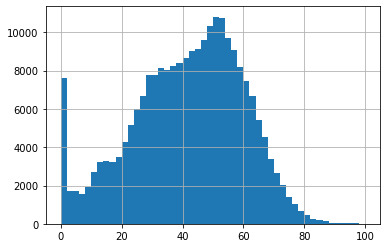

In [130]:
musics["popularity"].hist(bins=50)

In [131]:
# We do not have any missing values
musics.isnull().sum()

popularity                0
acousticness              0
danceability              0
duration_ms               0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
mode                      0
speechiness               0
tempo                     0
valence                   0
genre_Alternative         0
genre_Anime               0
genre_Blues               0
genre_Children's Music    0
genre_Children’s Music    0
genre_Classical           0
genre_Comedy              0
genre_Country             0
genre_Dance               0
genre_Electronic          0
genre_Folk                0
genre_Hip-Hop             0
genre_Indie               0
genre_Jazz                0
genre_Movie               0
genre_Opera               0
genre_Pop                 0
genre_R&B                 0
genre_Rap                 0
genre_Reggae              0
genre_Reggaeton           0
genre_Rock                0
genre_Ska                 0
genre_Soul          

## Data Preprocessing

We will scale our data 

In [132]:
#from sklearn.preprocessing import StandardScaler
#
#scaler = StandardScaler()
#scaler.fit(musics)
#musics_scale = scaler.transform(musics)
#musics_scale

## Data Clustering with K-Means

We will cluster the data with K-Means first. 
The labels_ attributes will be added to the dataframe as a new column. As we know that we have 27 genre of musics, lets try to have around 30 clusters. Then visualized our clusters by ploting results.

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=0).fit(musics)
musics['labels'] = kmeans.labels_

In [134]:
musics.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,labels
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23


In [135]:
musics['labels'].value_counts()

0     26831
27    26024
18    24307
8     23340
10    20001
24    17979
22    15992
6     13093
5     12616
14     9717
28     9415
23     6909
19     6662
13     4658
4      4320
2      3463
17     2605
26     1751
9      1295
15      684
1       414
25      270
11      137
29       96
7        43
12       38
3        27
21       26
20       10
16        2
Name: labels, dtype: int64

In [136]:
#import seaborn as sns
#cols = ["genre_Alternative",
#"genre_Anime",
#"genre_Blues",            
#"genre_Children's Music", 
#"genre_Children’s Music", 
#"genre_Classical",        
#"genre_Comedy",           
#"genre_Country",          
#"genre_Dance",            
#"genre_Electronic",   
#"genre_Folk",            
#"genre_Hip-Hop",          
#"genre_Indie",            
#"genre_Jazz",             
#"genre_Movie",            
#"genre_Opera",            
#"genre_Pop",              
#"genre_R&B",              
#"genre_Rap",              
#"genre_Reggae",           
#"genre_Reggaeton",        
#"genre_Rock",             
#"genre_Ska",              
#"genre_Soul",             
#"genre_Soundtrack",       
#"genre_World"]
#
#sns.lmplot("genre_Alternative", "acousticness", hue="labels" , data=musics[["genre_Alternative", "acousticness", "labels" ]], fit_reg=False)
#

In [137]:
#sns.pairplot(musics['genre','popularity'], hue='labels')

In [138]:
#sns.pairplot(musics_scale, hue='labels')

In [ ]:
dans chaque cluster bar plot sur les genre
si proche en terme de genre voir en quoi ils different

In [ ]:
voir les chansons les plus procha edu centroide

In [ ]:
top 10 chanson par cluster


In [231]:
def top_k_songs_by_cluster(k, df):
    for i in range(k):
        print("Cluster", i)
        centroid = kmeans.cluster_centers_[i]
        scores = [(index, euclidean(row, centroid)) for index, row in df[df.labels==i].drop("labels", axis=1).iterrows()]
        for song in sorted(scores, key = lambda x: x[1])[:10]:
            print(full_musics.iloc[song[0]]["artist_name"], 
                  "/", 
                  full_musics.iloc[song[0]]["track_name"],
                 "/",
                 full_musics.iloc[song[0]]["genre"])
        print("\n\n")

In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
musics_scaled = scaler.fit_transform(musics.drop("labels", axis=1))
kmeans = KMeans(n_clusters=30, random_state=0, n_jobs=-1).fit(musics_scaled)
musics_scaled = pd.DataFrame(musics_scaled)
musics_scaled['labels'] = kmeans.labels_

In [186]:
top_k_songs_by_cluster(30, musics_scaled)

Cluster 0
Ziggy Marley / I Don't Wanna Live on Mars
Genre Reggae
Buju Banton / Cry No More
Genre Reggae
The Holdup / Spoken For
Genre Reggae
SDIB / Where's That Girl
Genre Reggae
L'Entourloop / Loneliness Is Always Around
Genre Reggae
Bob Marley & The Wailers / Baby We've Got A Date (Rock It Baby) - Original Album Version
Genre Reggae
Quique Neira / Continente
Genre Reggae
Lucky Dube / Good Girl
Genre Reggae
Lucky Dube / Love Me (The Way I Am)
Genre Reggae
Lucky Dube / Teach the World
Genre Reggae



Cluster 1
The Babys / Back on My Feet Again
Genre Rock
The Raconteurs / Sunday Driver
Genre Rock
Bob Seger / Fire Lake
Genre Rock
Brothers Osborne / Pushing Up Daisies (Love Alive)
Genre Rock
Norman Greenbaum / Spirit In The Sky
Genre Rock
Queen / Keep Yourself Alive
Genre Rock
Paul McCartney / Jet - Remastered 2010
Genre Rock
Local Natives / Dark Days
Genre Rock
Joe Diffie / Prop Me Up Beside The Jukebox (If I Die)
Genre Rock
Meat Puppets / Backwater
Genre Rock



Cluster 2
Masaharu Fukuy

Giuseppe Verdi / Don Carlo - Highlights (1986 Digital Remaster): Canzone del velo 'Nel giardin del bello' (Eboli/Tebaldo/Dame)
Genre Opera
Giuseppe Verdi / Verdi: Don Carlos, Act 2: "Nei giardin del bello ... Tessete i veli" (Eboli, Tebaldo, Dame)
Genre Opera
Gioachino Rossini / Petite messe solennelle: Gloria: Petite messe solennelle: Gloria: III. Gratias
Genre Opera
Giacomo Puccini / La boheme, Act II: Quando m'en vo' soletta, "Musetta's Waltz"
Genre Opera
Giuseppe Verdi / Rigoletto, Act I: Ch'io gli parli
Genre Opera
Giuseppe Verdi / Il Trovatore / Act 1: "All'erta! all'erta!"
Genre Opera
Gaetano Donizetti / L'elisir d'amore / Act 2: "La donna è un animale...Venti scudi"
Genre Opera
Gaetano Donizetti / La fille du régiment / Act 2: Pour me rapprocher de Marie
Genre Opera
Jules Massenet / "Frère, voyez le beau bouquet!...Du gai soleil, plein de flamme...Heureux! Pourrai-je l'être encore?...Du gai soleil"
Genre Opera
Giuseppe Verdi / Macbeth, Act I: Che faceste? Dite su!
Genre Opera



In [184]:
musics_scaled['labels'].value_counts()

14    9370
21    9353
9     9345
11    9331
3     9321
1     9233
4     9231
22    9223
5     9204
6     9100
10    9042
17    8991
29    8962
20    8943
27    8938
13    8910
2     8864
16    8846
0     8755
12    8679
7     8640
25    8594
18    8004
26    7598
28    6222
23    5336
8     3280
19    2606
15     666
24     138
Name: labels, dtype: int64

In [188]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fixing random state for reproducibility
#np.random.seed(19680801)
#
#dt = 0.01
#t = np.arange(0, 30, dt)
#nse1 = np.random.randn(len(t))                 # white noise 1
#nse2 = np.random.randn(len(t))                 # white noise 2
#
## Two signals with a coherent part at 10Hz and a random part
#s1 = np.sin(2 * np.pi * 10 * t) + nse1
#s2 = np.sin(2 * np.pi * 10 * t) + nse2
#
#fig, axs = plt.subplots(2, 1)
#axs[0].plot(t, s1, t, s2)
#axs[0].set_xlim(0, 2)
#axs[0].set_xlabel('time')
#axs[0].set_ylabel('s1 and s2')
#axs[0].grid(True)
#
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('coherence')
#
#fig.tight_layout()
#plt.show()

In [189]:
full_musics["labels"] = kmeans.labels_

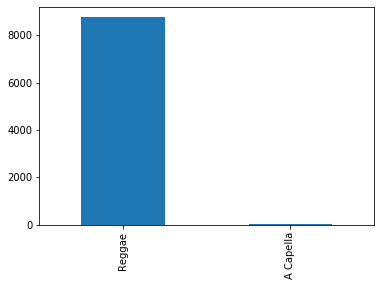

In [191]:
full_musics[full_musics["labels"]==0]["genre"].value_counts().plot.bar()

In [196]:
import time

In [220]:
def genre_by_cluster(k, df):
    fig, axs = plt.subplots(k, 1, figsize=(5, 5*k))
    for i in range(k):
        df[df["labels"] == i]["genre"].value_counts().plot.bar(ax=axs[i])
        axs[i].set_title('Cluster {0}'.format(i))
    fig.tight_layout()
    fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


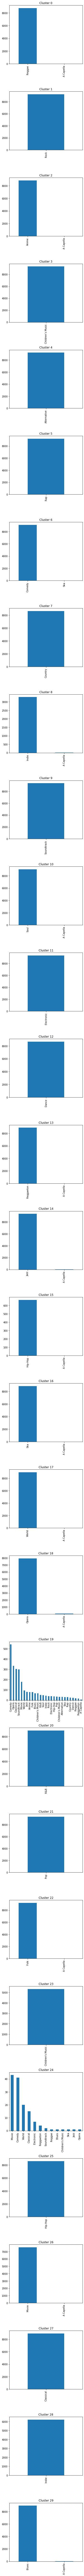

In [222]:
genre_by_cluster(30, full_musics)

In [228]:
scaler = StandardScaler()
cols = [col for col in musics.columns if not (col.startswith("genre") or col.startswith("key"))]
musics_scaled = scaler.fit_transform(musics[cols].drop("labels", axis=1))
kmeans = KMeans(n_clusters=30, random_state=0, n_jobs=-1).fit(musics_scaled)
musics_scaled = pd.DataFrame(musics_scaled)
musics_scaled['labels'] = kmeans.labels_
full_musics["labels"] = kmeans.labels_

In [229]:
top_k_songs_by_cluster(30, musics_scaled)

Cluster 0
Kate Nash / Nicest Thing
Genre Folk
Angus & Julia Stone / Passionfruit (triple j Like A Version)
Genre Folk
Angus & Julia Stone / Passionfruit (triple j Like A Version)
Genre Indie
Electric Light Orchestra / It's Over
Genre Folk
Bmike / I Deserve Better
Genre Hip-Hop
Mura Masa / When U Need Me
Genre Soul
Jhene Aiko / It's Cool
Genre R&B
Jhene Aiko / It's Cool
Genre Alternative
Jess Ray / Did Not Our Hearts Burn
Genre Children’s Music
Samm Henshaw / Better
Genre R&B



Cluster 1
Ramin Djawadi / Meaning of Life
Genre Soundtrack
Michael Giacchino / He's Here For Us
Genre Soundtrack
Hauschka / Skating Through the Woods
Genre Soundtrack
Ramin Djawadi / Rule of Three
Genre Soundtrack
Alan Menken / Beauty And The Beast
Genre Movie
Alan Menken / Beauty And The Beast
Genre Soundtrack
Blake Neely / I Will Wait for You
Genre Soundtrack
Sergei Rachmaninoff / Prelude in G minor, Op.23, No.5 : Alla marcia
Genre Classical
Franz Schubert / Serenade, D. 957, No. 4
Genre Classical
Jan A.P. Kac

Ryan Bingham / Sunshine
Genre Country
Snarky Puppy / Amour T'es La
Genre Jazz
Hillsong Worship / Look To The Son - Live
Genre World
NEEDTOBREATHE / Drive All Night (Acoustic Live)
Genre Alternative
Leon Bridges / Twistin' & Groovin' - Live at SXSW 2015
Genre Soul
Jamey Johnson / Playing The Part
Genre Country
Los Auténticos Decadentes / El Pájaro Vio el Cielo y Se Voló (Vivo)
Genre Ska
Justice / The Party
Genre Electronic
Queens of the Stone Age / The Lost Art Of Keeping A Secret
Genre Alternative
Queens of the Stone Age / The Lost Art Of Keeping A Secret
Genre Blues



Cluster 18
Thousand Foot Krutch / Running With Giants
Genre Alternative
Hey Violet / Unholy
Genre Dance
Hey Violet / Unholy
Genre Indie
Thousand Foot Krutch / Running With Giants
Genre Children’s Music
Allie X / Science
Genre Soul
Vinyl Theatre / New Machines
Genre Indie
Streetlight Manifesto / If and When We Rise Again
Genre Ska
Mariah Carey / All I Want For Christmas Is You
Genre R&B
Keith Urban / Gettin' In The Way
G

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


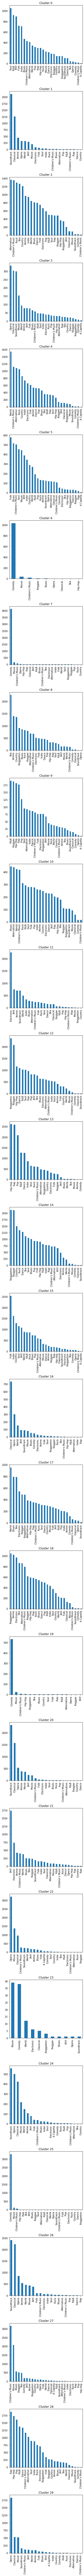

In [230]:
genre_by_cluster(30, full_musics)

array([27], dtype=int32)

## Predict next song

In [247]:
def next_song(ind):
    print(kmeans.predict(scaler.fit_transform(musics[cols].drop(columns=["labels"], axis=1))[ind].reshape(1, -1)))
    print(full_musics.iloc[ind])
    

In [248]:
next_song(10)

[16]
genre                                                           Movie
artist_name                                         Leopold Stokowski
track_name          Symphony No.4 In E Minor Op.98 : IV. Allegro E...
track_id                                       0XKgegoxLcIihK3Klpfo3N
popularity                                                          0
acousticness                                                    0.921
danceability                                                    0.191
duration_ms                                                    566960
energy                                                          0.145
instrumentalness                                                0.529
key                                                                 E
liveness                                                        0.141
loudness                                                      -17.239
mode                                                            Minor
speechiness    